In [1]:
import pickle
import torch
import sklearn
from tqdm import tqdm
import numpy as np
from asif import ASIF, extract_candidate_sets_from_clusters
from transformers import AutoTokenizer, AutoModel
from matplotlib import pyplot as plt
from datasets import Dataset, load_dataset
from torch.utils.data import DataLoader

/home/luigi/anaconda3/envs/chocolm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def elbow(X, cluster_sizes, label = "Elbow curve"):
    distorsions = []
    result = {}
    for k in tqdm(cluster_sizes):
        kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)
        result[k] = kmeans
    fig = plt.figure(figsize=(15, 5))
    plt.plot(cluster_sizes, distorsions)
    plt.xticks(cluster_sizes)
    plt.grid(True)
    plt.title(label)
    return result

In [3]:
chord_embeddings = pickle.load(open("data/chords_embeddings_sbert_chocolm.pkl", "rb"))
lyrics_embeddings = pickle.load(open("data/lyrics_embeddings_sbert_roberta.pkl", "rb"))

100%|██████████| 11/11 [03:21<00:00, 18.31s/it]


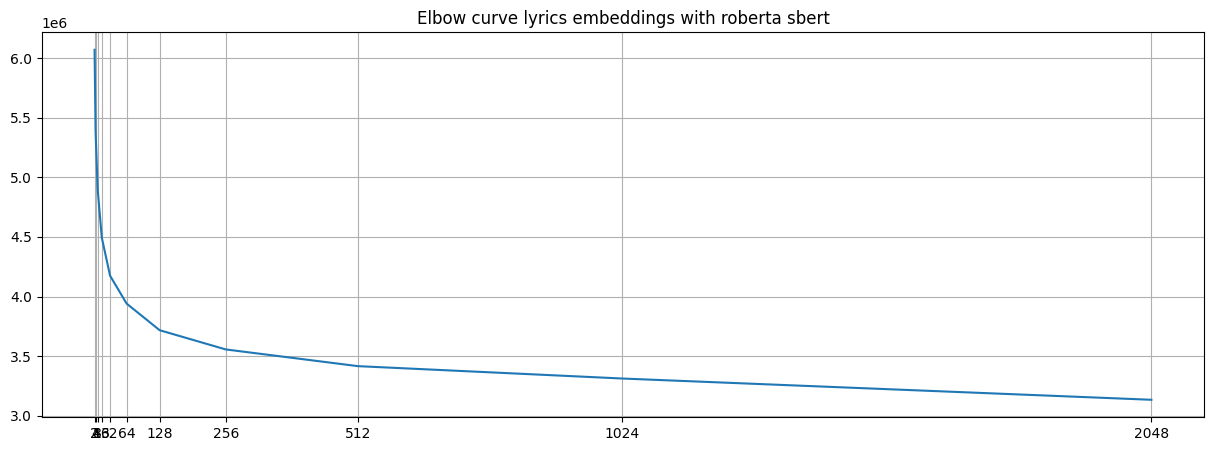

In [4]:
kmeans_runs_lyrics_embeddings_sbert_roberta = elbow(lyrics_embeddings.numpy(), [2**p for p in range(1, 12)], "Elbow curve lyrics embeddings with roberta sbert")

100%|██████████| 11/11 [01:11<00:00,  6.54s/it]


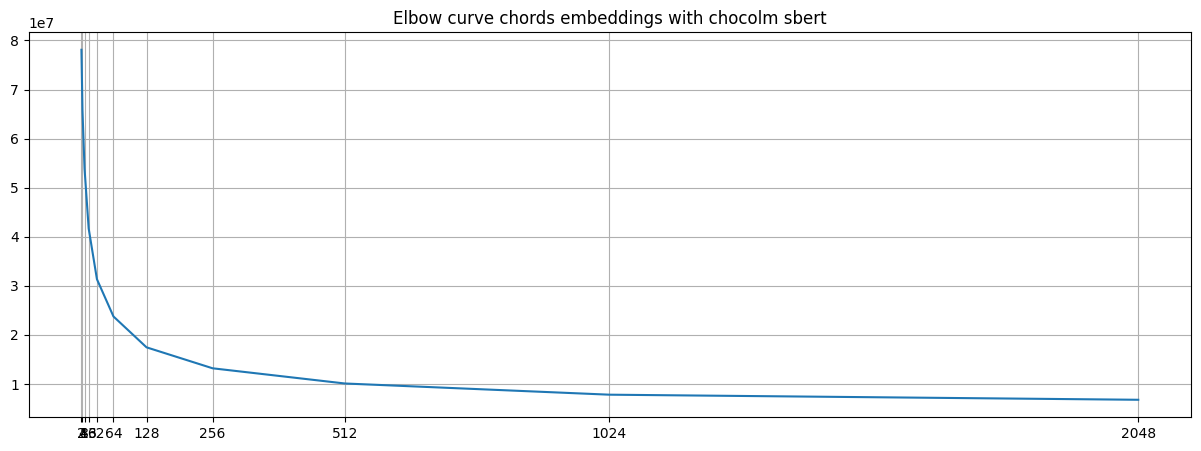

In [5]:
kmeans_runs_chords_embeddings_sbert_chocolm = elbow(chord_embeddings.numpy(), [2**p for p in range(1, 12)], "Elbow curve chords embeddings with chocolm sbert")

In [6]:
pickle.dump(kmeans_runs_lyrics_embeddings_sbert_roberta[64], open("data/lyrics_kmeans.pkl", "wb"))
pickle.dump(kmeans_runs_chords_embeddings_sbert_chocolm[64], open("data/chords_kmeans.pkl", "wb"))

In [3]:
embedding_mode = "ls"

train_lyrics_embeddings = pickle.load(open(f"experimental_data/embeddings/train_lyrics_embeddings_{embedding_mode}.pkl", "rb"))
train_chords_embeddings = pickle.load(open(f"experimental_data/embeddings/train_chords_embeddings_{embedding_mode}.pkl", "rb"))

test_lyrics_embeddings = pickle.load(open(f"experimental_data/embeddings/test_lyrics_embeddings_{embedding_mode}.pkl", "rb"))
test_chords_embeddings = pickle.load(open(f"experimental_data/embeddings/test_chords_embeddings_{embedding_mode}.pkl", "rb"))

100%|██████████| 8/8 [00:18<00:00,  2.33s/it]


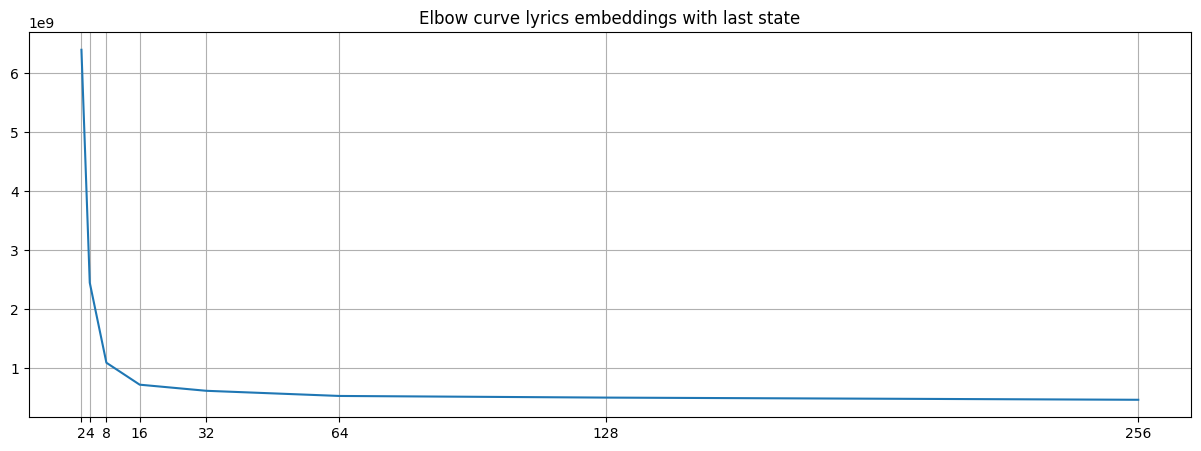

In [4]:
cluster_sizes = [2**p for p in range(1, 9)]
kmeans_runs_lyrics_ls = elbow(train_lyrics_embeddings.numpy(), cluster_sizes, "Elbow curve lyrics embeddings with last state")

100%|██████████| 8/8 [00:10<00:00,  1.32s/it]


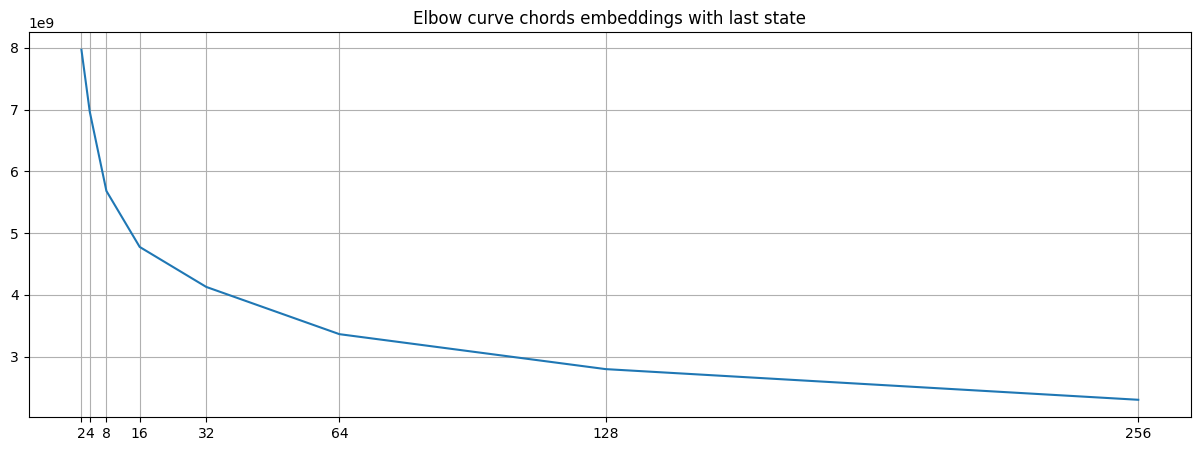

In [5]:
cluster_sizes = [2**p for p in range(1, 9)]
kmeans_runs_chords_ls = elbow(train_chords_embeddings.numpy(), cluster_sizes, "Elbow curve chords embeddings with last state")

In [6]:
best_kmeans_lyrics_last_state_embeddings = kmeans_runs_lyrics_ls[8]
best_kmeans_chords_last_state_embeddings = kmeans_runs_chords_ls[16]

In [7]:
embedding_mode = "hs"

train_lyrics_embeddings = pickle.load(open(f"experimental_data/embeddings/train_lyrics_embeddings_{embedding_mode}.pkl", "rb"))
train_chords_embeddings = pickle.load(open(f"experimental_data/embeddings/train_chords_embeddings_{embedding_mode}.pkl", "rb"))

test_lyrics_embeddings = pickle.load(open(f"experimental_data/embeddings/test_lyrics_embeddings_{embedding_mode}.pkl", "rb"))
test_chords_embeddings = pickle.load(open(f"experimental_data/embeddings/test_chords_embeddings_{embedding_mode}.pkl", "rb"))

100%|██████████| 8/8 [00:22<00:00,  2.78s/it]


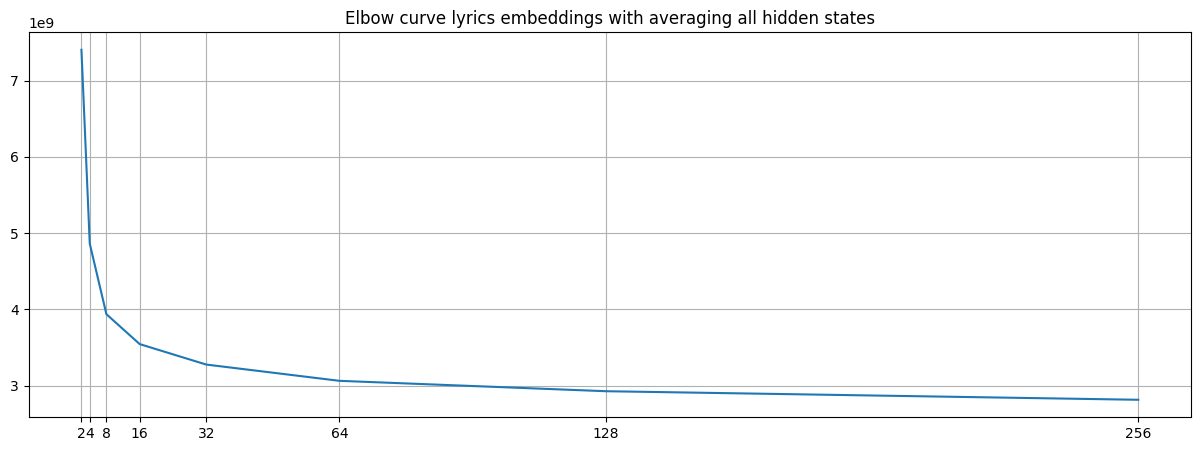

In [8]:
cluster_sizes = [2**p for p in range(1, 9)]
kmeans_runs_lyrics_hs = elbow(train_lyrics_embeddings.numpy(), cluster_sizes, "Elbow curve lyrics embeddings with averaging all hidden states")

100%|██████████| 8/8 [00:08<00:00,  1.06s/it]


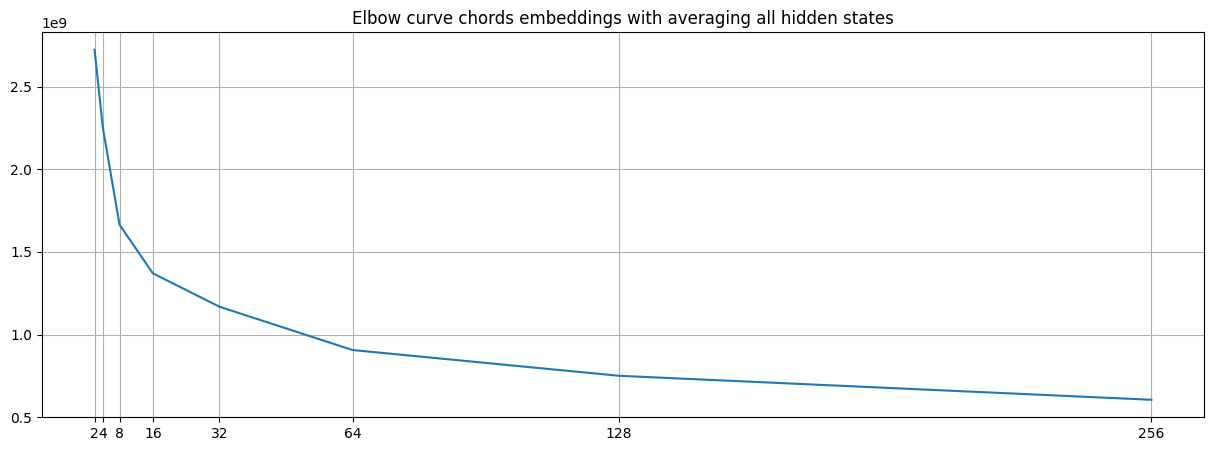

In [9]:
cluster_sizes = [2**p for p in range(1, 9)]
kmeans_runs_chords_hs = elbow(train_chords_embeddings.numpy(), cluster_sizes, "Elbow curve chords embeddings with averaging all hidden states")

In [10]:
best_kmeans_lyrics_all_hidden_states_embeddings = kmeans_runs_lyrics_hs[8]
best_kmeans_chords_all_hidden_states_embeddings = kmeans_runs_chords_hs[16]

In [11]:
pickle.dump(best_kmeans_chords_last_state_embeddings, open("experimental_data/best_kmeans_chords_embeddings_ls.pkl", "wb"))
pickle.dump(best_kmeans_lyrics_last_state_embeddings, open("experimental_data/best_kmeans_lyrics_embeddings_ls.pkl", "wb"))
pickle.dump(best_kmeans_lyrics_all_hidden_states_embeddings, open("experimental_data/best_kmeans_lyrics_embeddings_hs.pkl", "wb"))
pickle.dump(best_kmeans_chords_all_hidden_states_embeddings, open("experimental_data/best_kmeans_chords_embeddings_hs.pkl", "wb"))

In [12]:
train_lyrics_embeddings_sbert = pickle.load(open(f"experimental_data/embeddings/train_lyrics_sbert_embeddings.pkl", "rb"))
test_lyrics_embeddings_sbert = pickle.load(open(f"experimental_data/embeddings/test_lyrics_sbert_embeddings.pkl", "rb"))

100%|██████████| 11/11 [02:16<00:00, 12.42s/it]


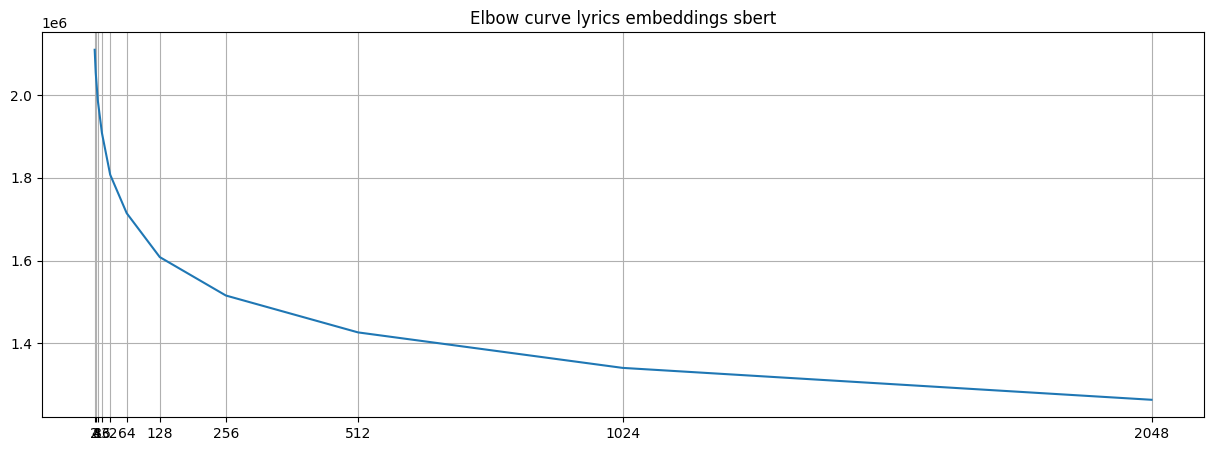

In [13]:
cluster_sizes = [2**p for p in range(1, 12)]
kmeans_runs_lyrics_sbert = elbow(train_lyrics_embeddings_sbert.numpy(), cluster_sizes, "Elbow curve lyrics embeddings sbert")

In [14]:
best_kmeans_lyrics_sbert_embeddings = kmeans_runs_lyrics_sbert[128]
pickle.dump(best_kmeans_lyrics_sbert_embeddings, open("experimental_data/best_kmeans_lyrics_sbert_embeddings.pkl", "wb"))

100%|██████████| 11/11 [02:46<00:00, 15.10s/it]


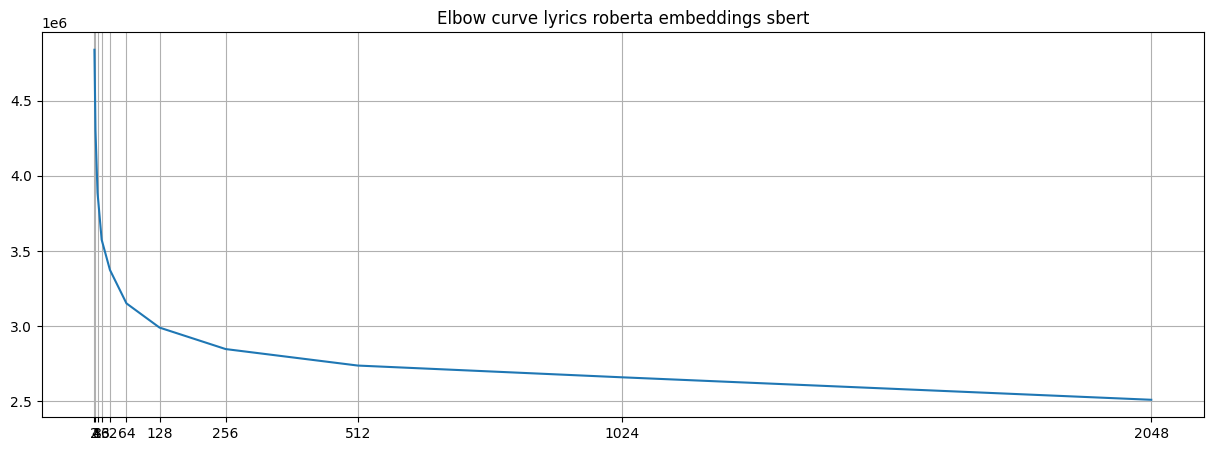

In [15]:
train_lyrics_roberta_sbert_embeddings = pickle.load(open("experimental_data/embeddings/train_lyrics_roberta_sbert_embeddings.pkl", "rb"))
kmeans_runs_lyrics_roberta_sbert = elbow(train_lyrics_roberta_sbert_embeddings.numpy(), [2**p for p in range(1, 12)], "Elbow curve lyrics roberta embeddings sbert")

In [16]:
pickle.dump(kmeans_runs_lyrics_roberta_sbert[128], open("experimental_data/best_kmeans_lyrics_roberta_sbert_embeddings.pkl", "wb"))

100%|██████████| 11/11 [00:56<00:00,  5.16s/it]


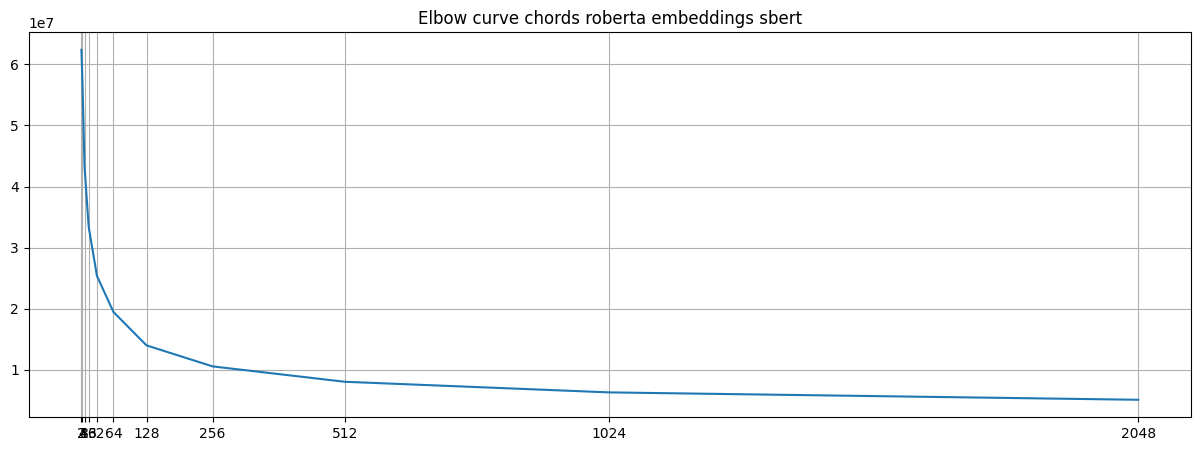

In [17]:
train_chords_chocolm_sbert_embeddings = pickle.load(open("experimental_data/embeddings/train_chords_chocolm_sbert_embeddings.pkl", "rb"))
kmeans_runs_chords_chocolm_sbert = elbow(train_chords_chocolm_sbert_embeddings.numpy(), [2**p for p in range(1, 12)], "Elbow curve chords roberta embeddings sbert")

In [18]:
pickle.dump(kmeans_runs_chords_chocolm_sbert[64], open("experimental_data/best_kmeans_lyrics_chocolm_sbert_embeddings.pkl", "wb"))

100%|██████████| 11/11 [01:00<00:00,  5.46s/it]


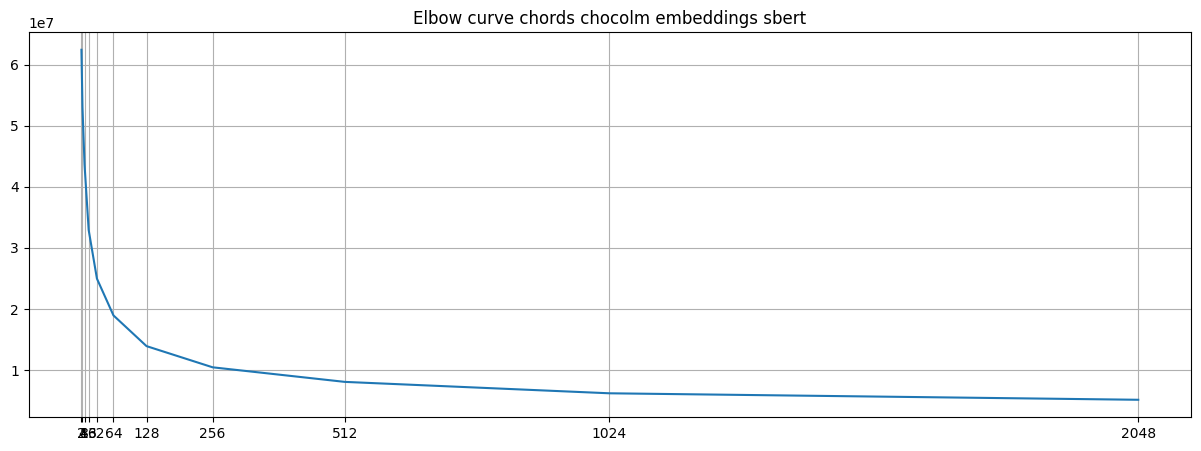

In [19]:
train_chords_chocolm_sbert_embeddings = pickle.load(open("experimental_data/embeddings/train_chords_chocolm_sbert_embeddings.pkl", "rb"))
test_chords_chocolm_sbert_embeddings = pickle.load(open("experimental_data/embeddings/test_chords_chocolm_sbert_embeddings.pkl", "rb"))
chords_chocolm_sbert_embeddings = torch.vstack([train_chords_chocolm_sbert_embeddings, test_chords_chocolm_sbert_embeddings])
chords_chocolm_sbert_kmeans_all = elbow(train_chords_chocolm_sbert_embeddings.numpy(), [2**p for p in range(1, 12)], "Elbow curve chords chocolm embeddings sbert")

In [20]:
pickle.dump(chords_chocolm_sbert_kmeans_all[128], open("experimental_data/best_kmeans_chords_chocolm_sbert_embeddings.pkl", "wb"))